In [1]:
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import models, layers
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.datasets import imdb

In [2]:
max_features=10000
max_length=150

In [3]:
(x_train,y_train),(x_test,y_test)=imdb.load_data(num_words=max_features)

17464789/17464789 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [4]:
x_train[0]

[1,
 14,
 22,
 16,
 43,
 530,
 973,
 1622,
 1385,
 65,
 458,
 4468,
 66,
 3941,
 4,
 173,
 36,
 256,
 5,
 25,
 100,
 43,
 838,
 112,
 50,
 670,
 2,
 9,
 35,
 480,
 284,
 5,
 150,
 4,
 172,
 112,
 167,
 2,
 336,
 385,
 39,
 4,
 172,
 4536,
 1111,
 17,
 546,
 38,
 13,
 447,
 4,
 192,
 50,
 16,
 6,
 147,
 2025,
 19,
 14,
 22,
 4,
 1920,
 4613,
 469,
 4,
 22,
 71,
 87,
 12,
 16,
 43,
 530,
 38,
 76,
 15,
 13,
 1247,
 4,
 22,
 17,
 515,
 17,
 12,
 16,
 626,
 18,
 2,
 5,
 62,
 386,
 12,
 8,
 316,
 8,
 106,
 5,
 4,
 2223,
 5244,
 16,
 480,
 66,
 3785,
 33,
 4,
 130,
 12,
 16,
 38,
 619,
 5,
 25,
 124,
 51,
 36,
 135,
 48,
 25,
 1415,
 33,
 6,
 22,
 12,
 215,
 28,
 77,
 52,
 5,
 14,
 407,
 16,
 82,
 2,
 8,
 4,
 107,
 117,
 5952,
 15,
 256,
 4,
 2,
 7,
 3766,
 5,
 723,
 36,
 71,
 43,
 530,
 476,
 26,
 400,
 317,
 46,
 7,
 4,
 2,
 1029,
 13,
 104,
 88,
 4,
 381,
 15,
 297,
 98,
 32,
 2071,
 56,
 26,
 141,
 6,
 194,
 7486,
 18,
 4,
 226,
 22,
 21,
 134,
 476,
 26,
 480,
 5,
 144,
 30,
 5535,
 18,

In [5]:
y_train[0]

1

In [6]:
#padding-----
x_train=sequence.pad_sequences(x_train,maxlen=max_length)
x_test=sequence.pad_sequences(x_test,maxlen=max_length)


In [7]:
#building the RNN

model=models.Sequential()
model.add(layers.Embedding(max_features,32))
model.add(layers.SimpleRNN(32))
model.add(layers.Dense(1,activation='sigmoid'))

In [8]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [9]:
history=model.fit(x_train,y_train,epochs=5,batch_size=32,validation_split=0.2)

Epoch 1/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 23s 33ms/step - accuracy: 0.5412 - loss: 0.6871 - val_accuracy: 0.6714 - val_loss: 0.6256
Epoch 2/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 22s 35ms/step - accuracy: 0.8055 - loss: 0.4699 - val_accuracy: 0.7960 - val_loss: 0.4457
Epoch 3/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 54s 56ms/step - accuracy: 0.9036 - loss: 0.2507 - val_accuracy: 0.8112 - val_loss: 0.4469
Epoch 4/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 26s 33ms/step - accuracy: 0.9622 - loss: 0.1179 - val_accuracy: 0.8320 - val_loss: 0.4934
Epoch 5/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 25s 40ms/step - accuracy: 0.9876 - loss: 0.0485 - val_accuracy: 0.8268 - val_loss: 0.5921


In [10]:
loss,accuracy=model.evaluate(x_test,y_test)

782/782 ━━━━━━━━━━━━━━━━━━━━ 8s 10ms/step - accuracy: 0.8174 - loss: 0.6172


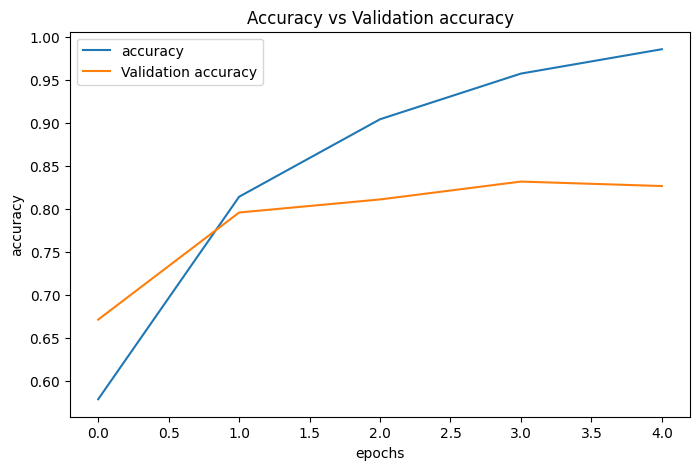

In [11]:
plt.figure(figsize=(8,5))
plt.plot(history.history['accuracy'],label='accuracy')
plt.plot(history.history['val_accuracy'],label='Validation accuracy')
plt.title("Accuracy vs Validation accuracy")
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.legend()

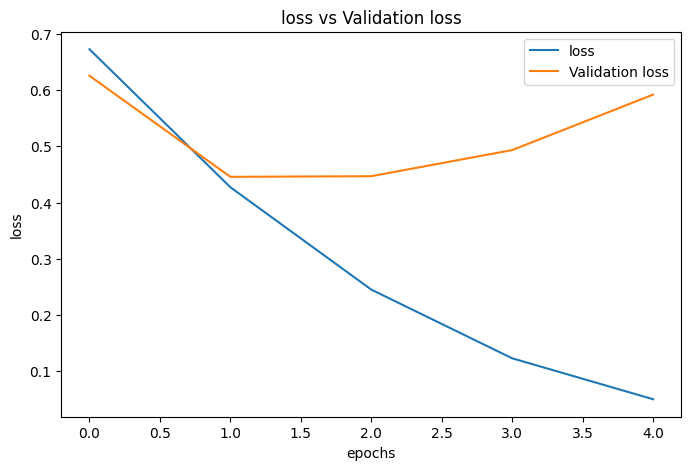

In [12]:
plt.figure(figsize=(8,5))
plt.plot(history.history['loss'],label='loss')
plt.plot(history.history['val_loss'],label='Validation loss')
plt.title("loss vs Validation loss")
plt.xlabel("epochs")
plt.ylabel("loss")
plt.legend()

In [13]:
prediction=model.predict(x_test[:5])

for index,predict in enumerate(prediction):
    sentiment='positive' if predict>0.5 else 'negative'
    print(f"{index}: predicted sentiment={sentiment}, actual sentiment ={y_test[index]}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 171ms/step
0: predicted sentiment=negative, actual sentiment =0
1: predicted sentiment=positive, actual sentiment =1
2: predicted sentiment=positive, actual sentiment =1
3: predicted sentiment=negative, actual sentiment =0
4: predicted sentiment=positive, actual sentiment =1


**LSTM------------->**

In [15]:
#lstm--------------

model_lstm=models.Sequential()
model_lstm.add(layers.Embedding(max_features,32))
model_lstm.add(layers.LSTM(32))
model_lstm.add(layers.Dense(1,activation='sigmoid'))


In [16]:
model_lstm.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [17]:
history=model_lstm.fit(x_train,y_train,epochs=5,batch_size=32,validation_split=0.2)

Epoch 1/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 38s 58ms/step - accuracy: 0.7015 - loss: 0.5464 - val_accuracy: 0.8574 - val_loss: 0.3451
Epoch 2/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 33s 53ms/step - accuracy: 0.8986 - loss: 0.2636 - val_accuracy: 0.8434 - val_loss: 0.3546
Epoch 3/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 45s 60ms/step - accuracy: 0.9250 - loss: 0.1999 - val_accuracy: 0.8646 - val_loss: 0.3904
Epoch 4/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 37s 55ms/step - accuracy: 0.9500 - loss: 0.1431 - val_accuracy: 0.8558 - val_loss: 0.3842
Epoch 5/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 42s 56ms/step - accuracy: 0.9672 - loss: 0.1017 - val_accuracy: 0.8570 - val_loss: 0.4836


In [18]:
loss,accuracy=model.evaluate(x_test,y_test)

782/782 ━━━━━━━━━━━━━━━━━━━━ 8s 10ms/step - accuracy: 0.8174 - loss: 0.6172
